Marissa Saenger
SIO221a HW1

Due Monday, October 3, 2022

#### Problem 1: Statistics of sea surface temperature

Download the 2021 sea surface temperature data for the Scripps Pier from the SCCOOS web site:
http://sccoos.org/thredds/catalog/autoss/catalog.html.



In [66]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm

ds = xr.open_dataset('http://sccoos.org/thredds/dodsC/autoss/scripps_pier-2021.nc') # Load data 
ds # View dataset

<xarray.Dataset>
Dimensions:                     (time: 129244)
Coordinates:
  * time                        (time) object 2021-01-01 00:01:35 ... 2021-12...
    lat                         float32 ...
    lon                         float32 ...
    depth                       float32 ...
Data variables: (12/27)
    temperature                 (time) float32 ...
    conductivity                (time) float32 ...
    pressure                    (time) float32 ...
    salinity                    (time) float32 ...
    chlorophyll_raw             (time) float32 ...
    chlorophyll                 (time) float32 ...
    ...                          ...
    aux4                        (time) float32 ...
    instrument1                 |S64 ...
    instrument2                 |S64 ...
    platform1                   |S64 ...
    station                     |S64 ...
    crs                         float64 ...
Attributes: (12/67)
    comment:                         The Scripps Pier automated shore station...
    platform_vocabulary:             GCMD Earth Science Keywords. Version 8.5
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         5
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds_vertical_crs:  EPSG:5829
    ...                              ...
    date_issued:                     2022-01-01T00:00:26Z
    time_coverage_start:             2021-01-01T00:01:35Z
    date_metadata_modified:          2022-01-01T00:00:26Z
    DODS.strlen:                     25
    DODS.dimName:                    stationNameLength
    DODS_EXTRA.Unlimited_Dimension:  time

a. Read the temperature data, and produce a line plot of the 2021 temperatures
with appropriately labeled axes. What do you observe in this plot?

In [67]:
temperature = ds.temperature # Save SST array from dataset as a separate data array called 'temperature' 

# Convert time array from cftime julian object to datetime64 object for easier handling
time = [np.datetime64(ti) for ti in ds.time.data] # Create new time array by converting each entry into datetime64
ds['time'] = time # Store new time array in dataset
time = ds.time # Store updated time array as variable 'time'

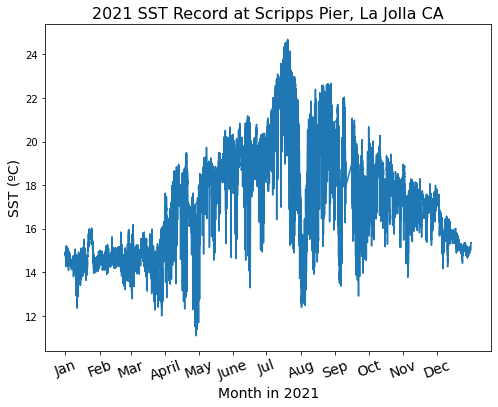

In [68]:
# Create figure
plt.figure(figsize=(8,6))
plt.plot(time, temperature)
plt.xlabel('Month in 2021', fontsize=14)
plt.ylabel('SST (ºC)', fontsize=14)
xticks = ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05','2021-06', 
         '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'];
xlabels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'];
plt.title('2021 SST Record at Scripps Pier, La Jolla CA', fontsize=16)
plt.xticks(ticks=xticks, labels=xlabels, rotation=20, fontsize=14);

This plot shows the sea surface temperature record observed off Scripps Pier over the course of 2021. We can observe a seasonal trend in SST with generally warmer sea surface temperatures in late summer and cooler sea surface temperatures in winter. There is also weekly and daily variability perhaps due to upwelling events or other physical ocean processes, or instrument noise.

b) Compute the mean and standard deviation for the sea surface temperature
data. What do these statistics tell you about the temperature in 2021?

In [69]:
print('Mean SIO pier sea surface temperature, 2021: \n', 
      np.round(temperature.mean(dim='time'),2).values, 
      'degrees Celsius')

Mean SIO pier sea surface temperature, 2021: 
 17.27 degrees Celsius


In [70]:
print('Standard deviation of SIO pier sea surface temperature, 2021: \n',
      np.round(temperature.std(dim='time'),2).values,
      'degrees Celsius')

Standard deviation of SIO pier sea surface temperature, 2021: 
 2.43 degrees Celsius


These statistics tell us that the mean sea surface temperature is around 17.3 degrees C (63.14 Fahrenheit, aka pretty chilly without a wetsuit) and that sea surface temperature varies about the mean with a standard deviation of about 2.4 degrees Celsius. A low standard deviation indicates minimal variability about the mean whereas a high standard deviation indicates lots of variability. This value of standard deviation tells us that the temperature varies by a few degrees about the mean throughout the year. 

c.) Compute an empirical probability density function for sea surface temperature.
Does it look like any of the distributions that we discussed in class?

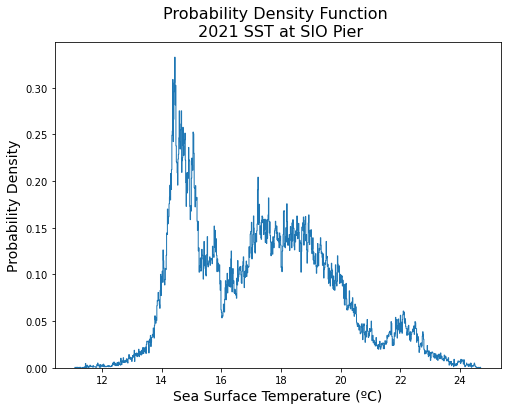

In [155]:
T = temperature.values

plt.figure(figsize=(8,6))
plt.hist(T, bins=1000, density=True, histtype='step');
plt.xlabel('Sea Surface Temperature (ºC)', fontsize=14);
plt.ylabel('Probability Density', fontsize=14);
plt.title('Probability Density Function \n 2021 SST at SIO Pier', fontsize=16);

This doesn't look like a purely Gaussian, bimodal, or uniform distribution like we saw in Lecture 2. The best way I can attempt to describe it is some combination of the three distribution types, with three Gaussian-ish 'peaks' around 14.5, 18, and 22 degrees C (in order of decreasing probability density), with non-zero probability density between the max and min SST values. 

#### 2. Extending the record. 

Now extend your record for the temperature from 2005-
2021 and repeat the calculations from the first exercise. (This is a good time to
practice using a loop to go through each of the data files.) What do you observe
in these results? In what ways are the 2021 results different from the 2005-2021
results? Is 2021 unusual? Is the sharp temperature change in August 2016 unusual?

['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
<xarray.Dataset>
Dimensions:                     (time: 1799019)
Coordinates:
  * time                        (time) object 2005-06-16 19:28:47 ... 2021-12...
    lat                         float32 32.87
    lon                         float32 -117.3
    depth                       float32 5.0
Data variables: (12/27)
    temperature                 (time) float32 20.28 20.31 20.34 ... 15.37 15.37
    conductivity                (time) float32 4.617 4.62 4.622 ... 4.144 4.144
    pressure                    (time) float32 4.465 4.507 4.527 ... 2.643 2.509
    salinity                    (time) float32 33.35 33.35 33.35 ... 33.34 33.34
    chlorophyll_raw             (time) float32 9.969e+36 9.969e+36 ... 5.0 5.0
    chlorophyll                 (time) float32 8.1 9.345 9.308 ... 68.05 68.05
    ...                          ...
    aux4                 

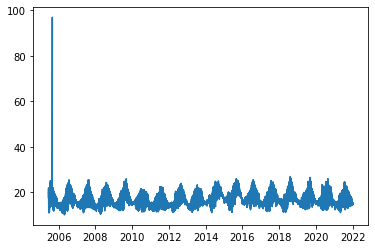

In [148]:
years = np.arange(5, 22) # create array of years after 2000 (2005-2021)

years_list = [] # create empty list to store strings of years
for year in years: # iterate through years
    if year < 10:
        years_list.append('200'+ str(year)) # create strings for 2005-2009 and add to list
    
    else: 
        years_list.append('20'+str(year)) # create strings for 2010-2021 and add to list
print(years_list) # print to check the strings are correct 
 
files = [] # create empty list of files
for year in years_list: # iterate over list of years as strings
    
    # open file for a given year as an xarray dataset
    ds = xr.open_dataset('http://sccoos.org/thredds/dodsC/autoss/scripps_pier-' + year + '.nc') 
    
    files.append(ds) # add dataset to 'files' list
    
ds_ext = xr.concat(files, dim='time') # concatenate files into one dataset over time dimension

print(ds_ext) # view extended dataset
    
temp_ext = ds_ext.temperature # use _ext to denote extended dataset
time_ext = [np.datetime64(ti) for ti in ds_ext.time.data]

# Create preliminary plot
plt.plot(time_ext, temp_ext);    

It looks like there is a temperature value that is super high (>80C), which I don't think is physically possible here based on my experience swimming around the end of the pier (where I assume these measurements are taken) nearly every single day. I am going to edit that value out since I am quite confident it's an instrument error.

In [137]:
# Search for where in the dataset this happens (aka at what timepoint)

i = 0 # establish an indexer
for value in temperature.values: # iterate through temperature values
    if value > 60: # if temperature > 60C
        print(temperature.isel(time=i).time.values) # print time value where that happens    
    i = i + 1 # advance indexer

2005-08-30 20:33:11


In [149]:
# Print the temperature value (in C) at this point to check that it's the abnormally high value

print(ds_ext.sel(time='2005-08-30 20:33:11').temperature.values)

[97.]


In [151]:
# Set the temprature value at this point to NaN
ds_ext['temperature'].loc[dict(time='2005-08-30 20:33:11')] = np.nan

# Print the temperature value to make sure it has been reset to NaN
print(ds_ext.sel(time='2005-08-30 20:33:11').temperature.values)

[nan]


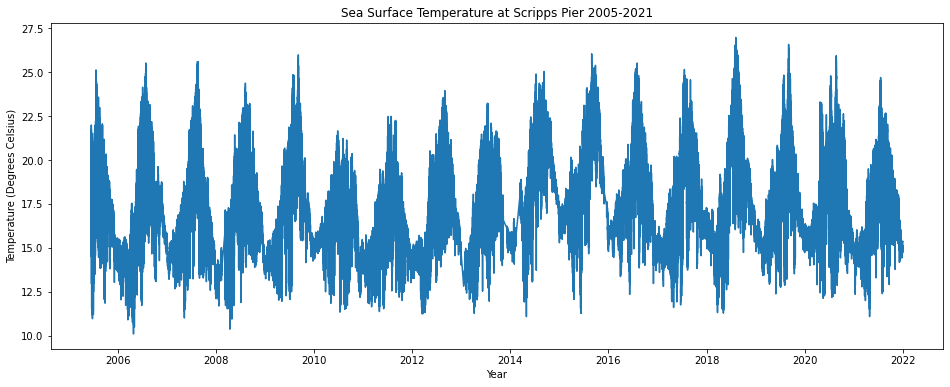

In [152]:
# Reset the temperature variable to account for this change and re-plot.
temp_ext = ds_ext.temperature

plt.figure(figsize=(16,6));
plt.plot(time_ext, temp_ext);
plt.xlabel('Year');
plt.ylabel('Temperature (Degrees Celsius)');
plt.title('Sea Surface Temperature at Scripps Pier 2005-2021');

Mean and standard deviation calculations for extended record

In [153]:
print('Mean SIO pier sea surface temperature, 2005-2021: \n', 
      np.round(temp_ext.mean(dim='time'),2).values, 
      'degrees Celsius')

Mean SIO pier sea surface temperature, 2005-2021: 
 17.8 degrees Celsius


In [154]:
print('Standard deviation of SIO pier sea surface temperature, 2005-2021: \n',
      np.round(temperature.std(dim='time'),2).values,
      'degrees Celsius')

Standard deviation of SIO pier sea surface temperature, 2005-2021: 
 2.74 degrees Celsius


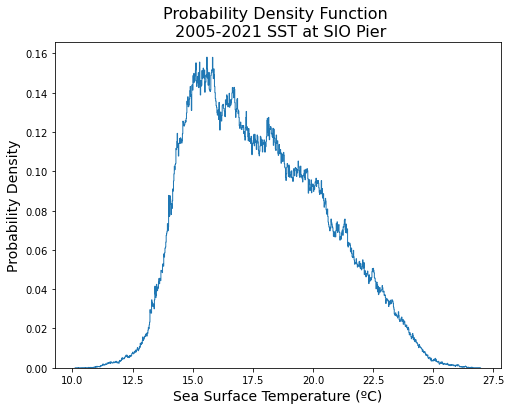

In [159]:
T = temp_ext.values

plt.figure(figsize=(8,6))
plt.hist(T, bins=1000, density=True, histtype='step');
plt.xlabel('Sea Surface Temperature (ºC)', fontsize=14);
plt.ylabel('Probability Density', fontsize=14);
plt.title('Probability Density Function \n 2005-2021 SST at SIO Pier', fontsize=16);

The PDF shows a slightly more Gaussian-looking distribution (though still not purely Gaussian) with peak probability density around 15 degrees C.

The extended record has a slightly higher mean SST and a slightly larger standard deviation than the 2021 record. This may tell us that there were more upwelling events than usual in 2021 or that there is typically more annual variability in SST than was seen in 2021, although it's hard to say for sure what physical events explain the differences. 


Overall, we see an annual seasonal cycle with generally warmer SSTs in late summer and cooler SSTs in winter/spring, but there are some more abrupt daily or weekly changes within that cycle. 2021 does not seem to be an unusual year compared to the others in this extended record. 

The sudden drop in SST recorded in August 2016 doesn't seem to be unusual given the abrupt changes seen in other years. 